<a href="https://colab.research.google.com/github/EricTuason/MachineVisionDemo/blob/main/IterativeMachineVisionDemo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Iterative Machine Vision Models

##### Eric Daniel Tuason
##### Created June 7, 2023

In [ ]:
# Imports required for the following modules

import torch
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
import torch.optim as optim
%matplotlib inline

#### Simple Model
There will be `30730` parameters. The input image is a 3 channel, 32 x 32 image that connects to 10 output nodes. Therefore there are 32 x 32 x 3 x 10 = 30720 weight parameters. Furthermore, each output node has a bias and so we add 10 to get the total number of parameters of 30730.

In [ ]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc = nn.Linear(32*32*3, 10)

    def forward(self, x):
        x = x.view(-1, 32*32*3)
        x = self.fc(x)
        return x


net = Net()

Files already downloaded and verified
Files already downloaded and verified
Completed Epochs:
1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,

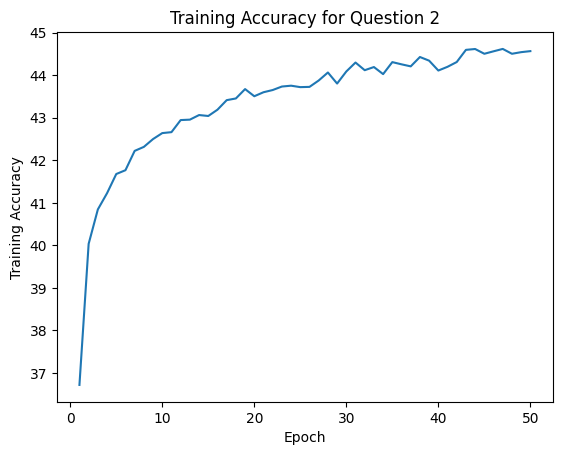

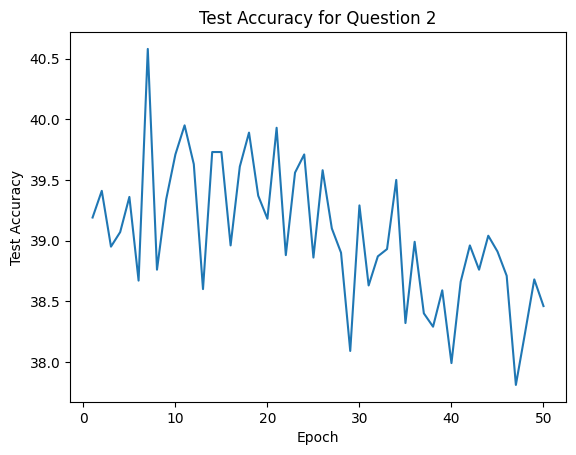

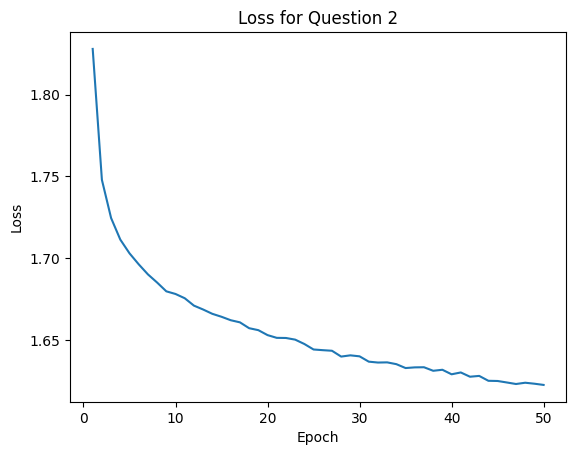

<Figure size 640x480 with 0 Axes>

In [ ]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=200,
                                         shuffle=False, num_workers=2)

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

# Define a Loss function and optimizer
criterion = nn.CrossEntropyLoss() # using values found in tutorial code
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

net = Net()
net.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

num_epochs = 50
epoch_itr = np.arange(1,num_epochs+1)
loss_epoch = np.zeros(num_epochs)
train_acc = np.zeros(num_epochs)
test_acc = np.zeros(num_epochs)
print("Completed Epochs:")
for epoch in range(num_epochs):  # loop over the dataset multiple times

    running_loss = 0.0
    correct_train = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item() * inputs.size(0)
        correct_train += (outputs.argmax(axis=1) == labels).float().sum()

    loss_epoch[epoch] = running_loss / len(trainset)
    train_acc[epoch] = 100 * correct_train / len(trainset)
    # calculate testing accuracy and add to storage array
    correct = 0
    total = 0
    with torch.no_grad():
      for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    test_acc[epoch] = 100 * correct / total
    print(epoch+1,',',end='',sep='')

# Print graphs
for i,names in enumerate((('Training Accuracy',train_acc),("Test Accuracy",test_acc),("Loss",loss_epoch))):
    title, var_name = names
    plt.title(str(title) + " for Question 2")
    plt.xlabel("Epoch")
    plt.ylabel(str(title))
    plt.plot(epoch_itr,var_name)
    plt.figure()
plt.show()

If we did not use ReLU (or any other non-linear activation function) then we would effectively have one fully connected layer. For example, if we have the layers of: X2=W1X+b1 and y=W2X2+b2, then for:y=WX+b, we can easily find the values for W and b via substitution:y=W2(W1X+b1)+b2->y=W2W1X=(b1+b2). W = W1W2 and b = b1+b2. Thus having multiple layers without ReLU has the same effect as a single fully connected layer.

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(32*32*3, 140)
        self.fc2 = nn.Linear(140, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = x.view(-1, 32*32*3)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

Files already downloaded and verified
Files already downloaded and verified
Completed Epochs:
1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,

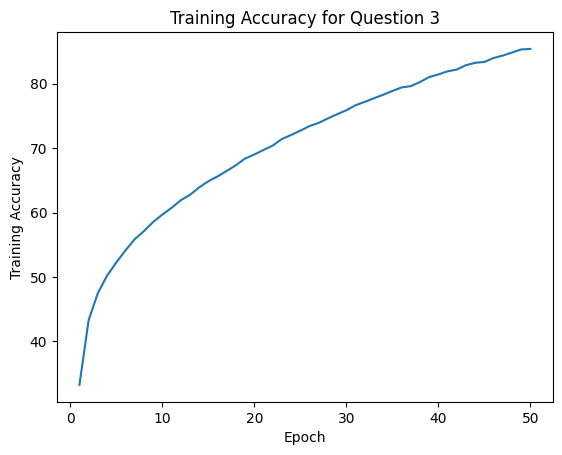

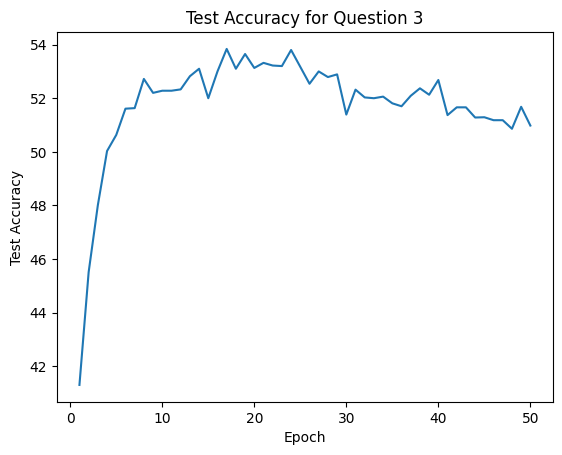

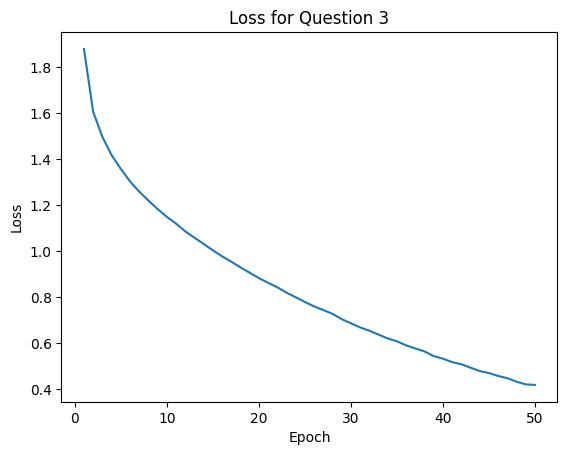

<Figure size 640x480 with 0 Axes>

In [ ]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=200,
                                         shuffle=False, num_workers=4)

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

# Define a Loss function and optimizer
criterion = nn.CrossEntropyLoss() # using values found in tutorial code
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

net = Net()
net.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

num_epochs = 50
epoch_itr = np.arange(1,num_epochs+1)
loss_epoch = np.zeros(num_epochs)
train_acc = np.zeros(num_epochs)
test_acc = np.zeros(num_epochs)
print("Completed Epochs:")
for epoch in range(num_epochs):  # loop over the dataset multiple times

    running_loss = 0.0
    correct_train = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item() * inputs.size(0)
        correct_train += (outputs.argmax(axis=1) == labels).float().sum()

    loss_epoch[epoch] = running_loss / len(trainset)
    train_acc[epoch] = 100 * correct_train / len(trainset)
    # calculate testing accuracy and add to storage array
    correct = 0
    total = 0
    with torch.no_grad():
      for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    test_acc[epoch] = 100 * correct / total
    print(epoch+1,',',end='',sep='')

# Print graphs
for i,names in enumerate((('Training Accuracy',train_acc),("Test Accuracy",test_acc),("Loss",loss_epoch))):
    title, var_name = names
    plt.title(str(title) + " for Question 3")
    plt.xlabel("Epoch")
    plt.ylabel(str(title))
    plt.plot(epoch_itr,var_name)
    plt.figure()
plt.show()

## Create Final model
Change the code by adding two convolutional layers along with maxpooling layers before the fully connected layers. Use this model for the following sections.

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 140)
        self.fc2 = nn.Linear(140, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [ ]:
import torch

# Test if we are connected to a CUDA enabled gpu
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

net.to(device)

cuda:0


Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=140, bias=True)
  (fc2): Linear(in_features=140, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

For the output of this model's training, please see Question 5: Batch Size 4

### Findings for Batch Size

Each batch size ends with different accuracies and losses with very different trends. The batch size of 1000 ends the training period with a lower accuracy and higher loss than the batch size of 4, but if similar trends continue in the 1000 batch size graph then it is likely this is because the 50 epochs isn't enough to reach a base prediction model as it is for the smaller batch sizes. The batch size of 1 leads to an underfitting model, similarly to the effects of a high learning rate. The likely cause of this underfitting is that the model cannot generalize properly since it only sees one image at once.

### Batch Size 1

Files already downloaded and verified
Files already downloaded and verified
Completed Epochs:
1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,

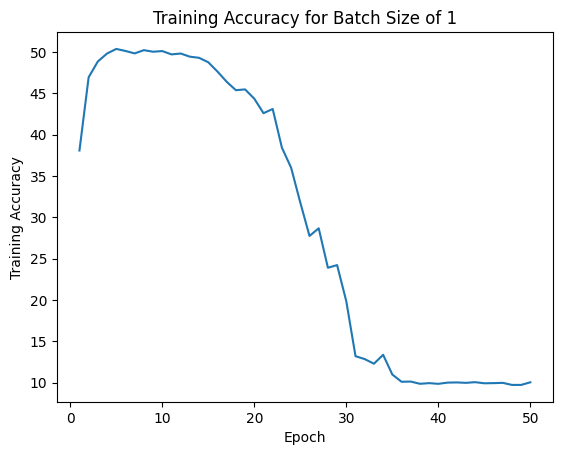

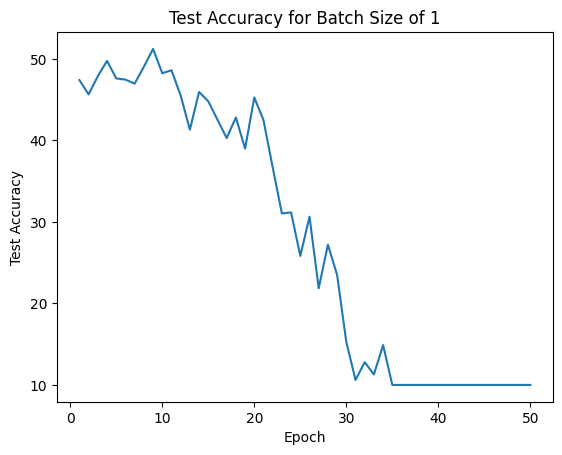

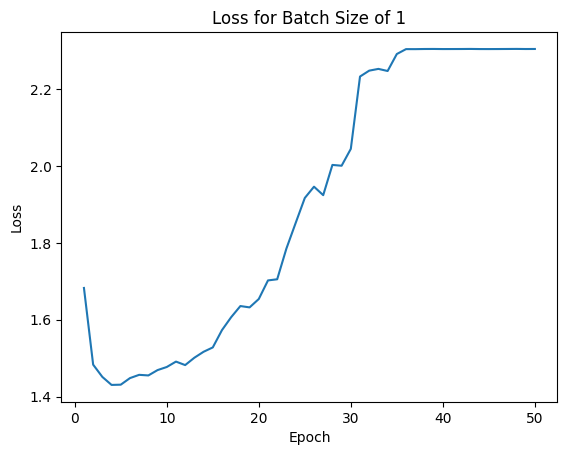

<Figure size 640x480 with 0 Axes>

In [ ]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=200,
                                         shuffle=False, num_workers=2)

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=1, # THIS IS WHERE BATCH SIZE IS SET IN EACH MODULE
                                          shuffle=True, num_workers=2)

# Define a Loss function and optimizer
criterion = nn.CrossEntropyLoss() # using values found in tutorial code
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

net = Net()
net.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

num_epochs = 50
epoch_itr = np.arange(1,num_epochs+1)
loss_epoch = np.zeros(num_epochs)
train_acc = np.zeros(num_epochs)
test_acc = np.zeros(num_epochs)
print("Completed Epochs:")
for epoch in range(num_epochs):  # loop over the dataset multiple times

    running_loss = 0.0
    correct_train = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item() * inputs.size(0)
        correct_train += (outputs.argmax(axis=1) == labels).float().sum()

    loss_epoch[epoch] = running_loss / len(trainset)
    train_acc[epoch] = 100 * correct_train / len(trainset)
    # calculate testing accuracy and add to storage array
    correct = 0
    total = 0
    with torch.no_grad():
      for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    test_acc[epoch] = 100 * correct / total
    print(epoch+1,',',end='',sep='')

# Print graphs
for i,names in enumerate((('Training Accuracy',train_acc),("Test Accuracy",test_acc),("Loss",loss_epoch))):
    title, var_name = names
    plt.title(str(title) + " for Batch Size of 1")
    plt.xlabel("Epoch")
    plt.ylabel(str(title))
    plt.plot(epoch_itr,var_name)
    plt.figure()
plt.show()

### Batch Size 4

In [ ]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=200,
                                         shuffle=False, num_workers=2)

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

# Define a Loss function and optimizer
criterion = nn.CrossEntropyLoss() # using values found in tutorial code
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

net = Net()
net.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

num_epochs = 50
epoch_itr = np.arange(1,num_epochs+1)
loss_epoch = np.zeros(num_epochs)
train_acc = np.zeros(num_epochs)
test_acc = np.zeros(num_epochs)
print("Completed Epochs:")
for epoch in range(num_epochs):  # loop over the dataset multiple times

    running_loss = 0.0
    correct_train = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item() * inputs.size(0)
        correct_train += (outputs.argmax(axis=1) == labels).float().sum()

    loss_epoch[epoch] = running_loss / len(trainset)
    train_acc[epoch] = 100 * correct_train / len(trainset)
    # calculate testing accuracy and add to storage array
    correct = 0
    total = 0
    with torch.no_grad():
      for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    test_acc[epoch] = 100 * correct / total
    print(epoch+1,',',end='',sep='')

# Print graphs
for i,names in enumerate((('Training Accuracy',train_acc),("Test Accuracy",test_acc),("Loss",loss_epoch))):
    title, var_name = names
    plt.title(str(title) + " for Batch Size of 4")
    plt.xlabel("Epoch")
    plt.ylabel(str(title))
    plt.plot(epoch_itr,var_name)
    plt.figure()
plt.show()

(The graphs are presented on a different module because I forgot to rename the graphs originally and didn't want to re-run).

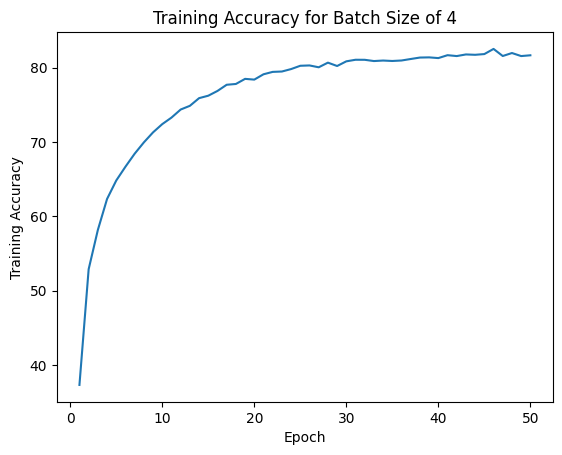

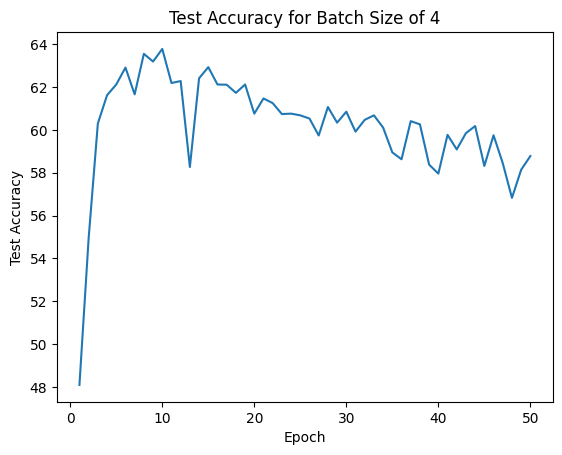

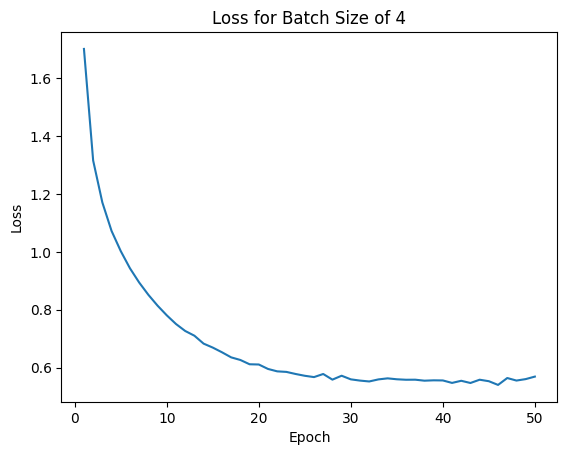

<Figure size 640x480 with 0 Axes>

In [ ]:
# Print graphs
for i,names in enumerate((('Training Accuracy',train_acc),("Test Accuracy",test_acc),("Loss",loss_epoch))):
    title, var_name = names
    plt.title(str(title) + " for Batch Size of 4")
    plt.xlabel("Epoch")
    plt.ylabel(str(title))
    plt.plot(epoch_itr,var_name)
    plt.figure()
plt.show()

### Batch Size 1000

Files already downloaded and verified
Files already downloaded and verified
Completed Epochs:
1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,

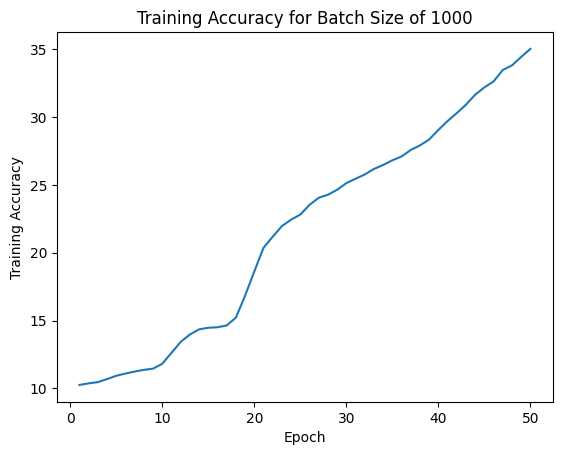

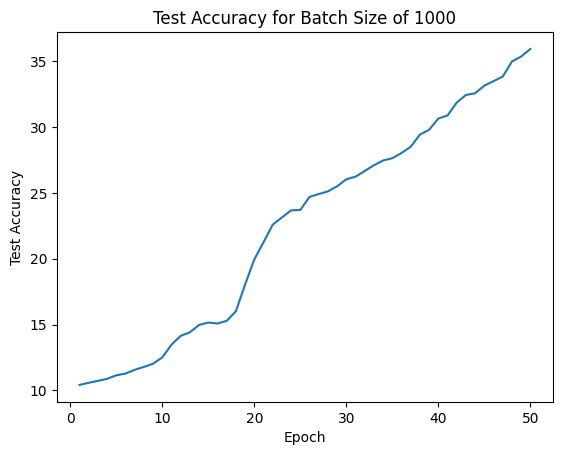

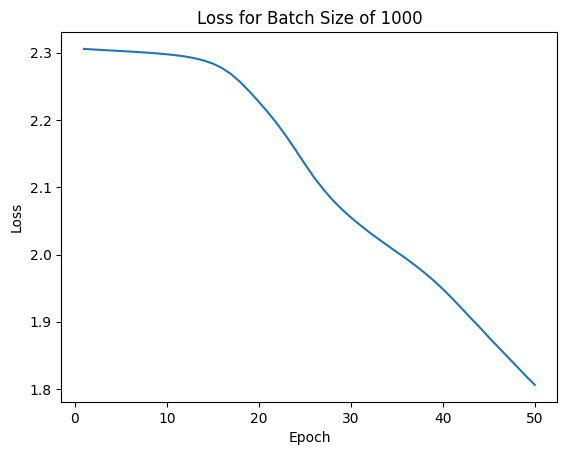

<Figure size 640x480 with 0 Axes>

In [ ]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=200,
                                         shuffle=False, num_workers=2)

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=1000,
                                          shuffle=True, num_workers=2)

# Define a Loss function and optimizer
criterion = nn.CrossEntropyLoss() # using values found in tutorial code
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

net = Net()
net.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

num_epochs = 50
epoch_itr = np.arange(1,num_epochs+1)
loss_epoch = np.zeros(num_epochs)
train_acc = np.zeros(num_epochs)
test_acc = np.zeros(num_epochs)
print("Completed Epochs:")
for epoch in range(num_epochs):  # loop over the dataset multiple times

    running_loss = 0.0
    correct_train = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item() * inputs.size(0)
        correct_train += (outputs.argmax(axis=1) == labels).float().sum()

    loss_epoch[epoch] = running_loss / len(trainset)
    train_acc[epoch] = 100 * correct_train / len(trainset)
    # calculate testing accuracy and add to storage array
    correct = 0
    total = 0
    with torch.no_grad():
      for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    test_acc[epoch] = 100 * correct / total
    print(epoch+1,',',end='',sep='')

# Print graphs
for i,names in enumerate((('Training Accuracy',train_acc),("Test Accuracy",test_acc),("Loss",loss_epoch))):
    title, var_name = names
    plt.title(str(title) + " for Batch Size of 1000")
    plt.xlabel("Epoch")
    plt.ylabel(str(title))
    plt.plot(epoch_itr,var_name)
    plt.figure()
plt.show()

### Findings for Learning Rate

Each learning rate create very different accuracy and loss curves. The learning rates of 10 and 0.1 don't result in faster training, but rather in no learning at all, since the training accuracy doesn't improve and loss remains constantly high. With lower training rates, the model does train and obtains relatively high accuracies with low loss. While the rate of 0.01 ends up overfitting, with training accuracy lowering after around 10 epochs, the 0.0001 learning rate creates far smoother graphs with a base prediction model that has a relatively high test accuracy and low loss. Unlike the other learning rates, 0.0001 does not end up over or underfitting.  

In [ ]:
## Pre-define elements that don't change to shorten following modules

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=200,
                                         shuffle=False, num_workers=2)

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

# Define a Loss function and optimizer
criterion = nn.CrossEntropyLoss() # using values found in tutorial code
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

Files already downloaded and verified
Files already downloaded and verified


### Learning Rate of 10

Completed Epochs:
1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,

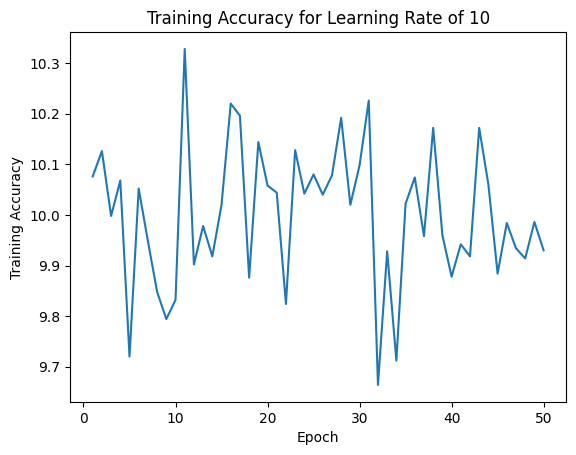

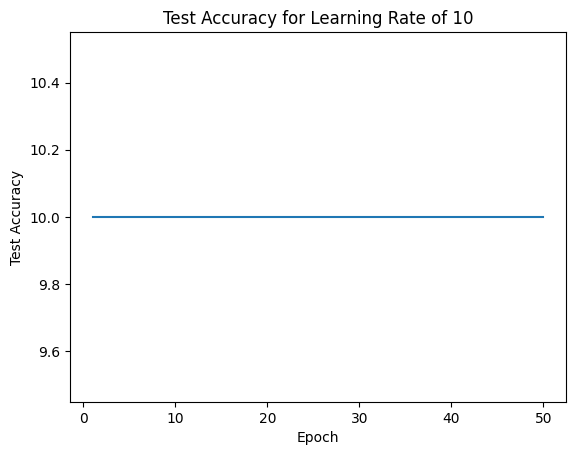

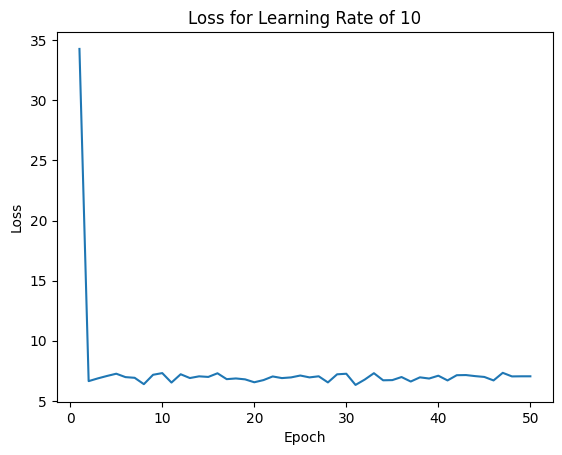

<Figure size 640x480 with 0 Axes>

In [ ]:
net = Net()
net.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=10.0, momentum=0.9) ### THIS IS WHERE LEARNING RATE IS SET FOR EACH MODEL

num_epochs = 50
epoch_itr = np.arange(1,num_epochs+1)
loss_epoch = np.zeros(num_epochs)
train_acc = np.zeros(num_epochs)
test_acc = np.zeros(num_epochs)
print("Completed Epochs:")
for epoch in range(num_epochs):  # loop over the dataset multiple times

    running_loss = 0.0
    correct_train = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item() * inputs.size(0)
        correct_train += (outputs.argmax(axis=1) == labels).float().sum()

    loss_epoch[epoch] = running_loss / len(trainset)
    train_acc[epoch] = 100 * correct_train / len(trainset)
    # calculate testing accuracy and add to storage array
    correct = 0
    total = 0
    with torch.no_grad():
      for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    test_acc[epoch] = 100 * correct / total
    print(epoch+1,',',end='',sep='')

# Print graphs
for i,names in enumerate((('Training Accuracy',train_acc),("Test Accuracy",test_acc),("Loss",loss_epoch))):
    title, var_name = names
    plt.title(str(title) + " for Learning Rate of 10")
    plt.xlabel("Epoch")
    plt.ylabel(str(title))
    plt.plot(epoch_itr,var_name)
    plt.figure()
plt.show()

### Learning Rate of 0.1



Completed Epochs:
1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,

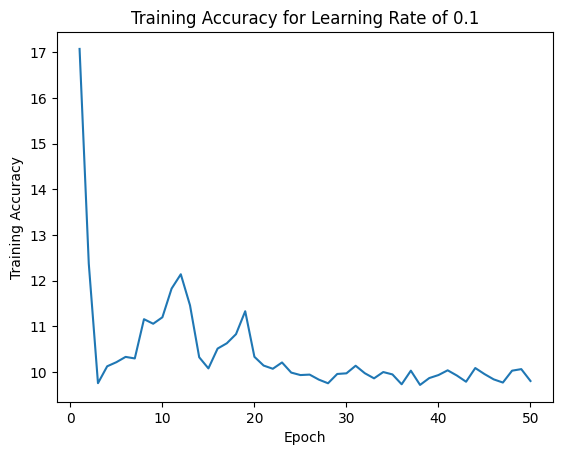

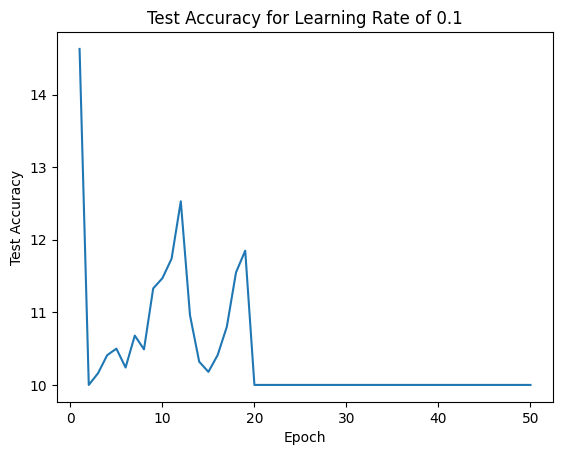

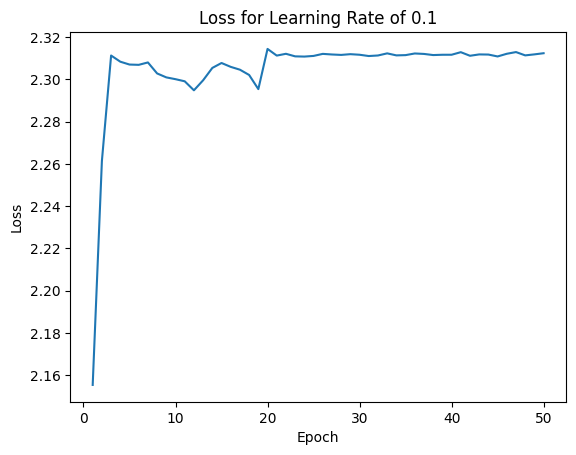

<Figure size 640x480 with 0 Axes>

In [ ]:
net = Net()
net.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.1, momentum=0.9) ### THIS IS WHERE LEARNING RATE IS SET FOR EACH MODEL

num_epochs = 50
epoch_itr = np.arange(1,num_epochs+1)
loss_epoch = np.zeros(num_epochs)
train_acc = np.zeros(num_epochs)
test_acc = np.zeros(num_epochs)
print("Completed Epochs:")
for epoch in range(num_epochs):  # loop over the dataset multiple times

    running_loss = 0.0
    correct_train = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item() * inputs.size(0)
        correct_train += (outputs.argmax(axis=1) == labels).float().sum()

    loss_epoch[epoch] = running_loss / len(trainset)
    train_acc[epoch] = 100 * correct_train / len(trainset)
    # calculate testing accuracy and add to storage array
    correct = 0
    total = 0
    with torch.no_grad():
      for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    test_acc[epoch] = 100 * correct / total
    print(epoch+1,',',end='',sep='')

# Print graphs
for i,names in enumerate((('Training Accuracy',train_acc),("Test Accuracy",test_acc),("Loss",loss_epoch))):
    title, var_name = names
    plt.title(str(title) + " for Learning Rate of 0.1")
    plt.xlabel("Epoch")
    plt.ylabel(str(title))
    plt.plot(epoch_itr,var_name)
    plt.figure()
plt.show()

### Learning Rate of 0.01



Completed Epochs:
1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,

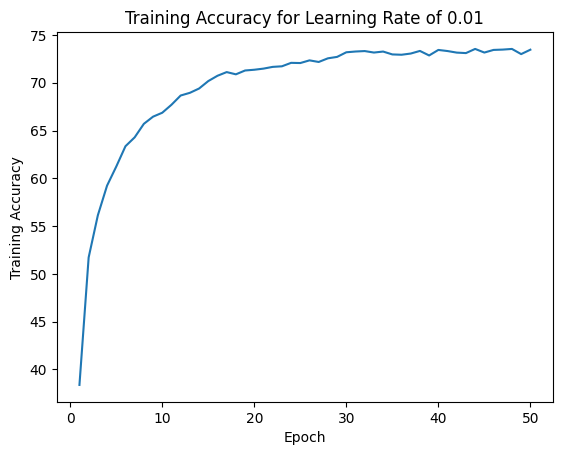

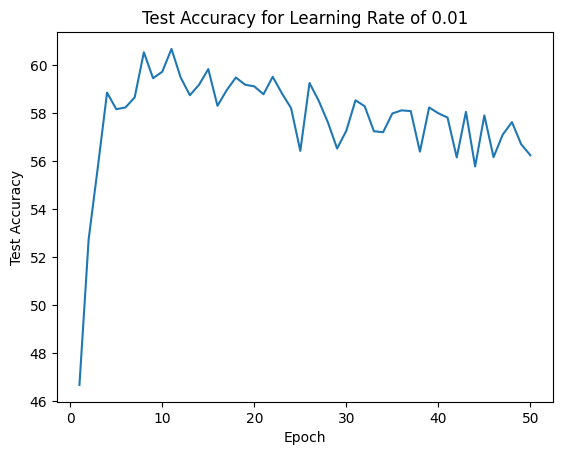

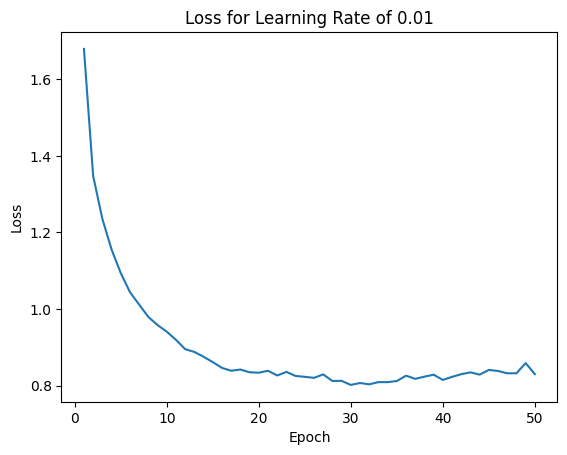

<Figure size 640x480 with 0 Axes>

In [ ]:
net = Net()
net.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9) ### THIS IS WHERE LEARNING RATE IS SET FOR EACH MODEL

num_epochs = 50
epoch_itr = np.arange(1,num_epochs+1)
loss_epoch = np.zeros(num_epochs)
train_acc = np.zeros(num_epochs)
test_acc = np.zeros(num_epochs)
print("Completed Epochs:")
for epoch in range(num_epochs):  # loop over the dataset multiple times

    running_loss = 0.0
    correct_train = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item() * inputs.size(0)
        correct_train += (outputs.argmax(axis=1) == labels).float().sum()

    loss_epoch[epoch] = running_loss / len(trainset)
    train_acc[epoch] = 100 * correct_train / len(trainset)
    # calculate testing accuracy and add to storage array
    correct = 0
    total = 0
    with torch.no_grad():
      for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    test_acc[epoch] = 100 * correct / total
    print(epoch+1,',',end='',sep='')

# Print graphs
for i,names in enumerate((('Training Accuracy',train_acc),("Test Accuracy",test_acc),("Loss",loss_epoch))):
    title, var_name = names
    plt.title(str(title) + " for Learning Rate of 0.01")
    plt.xlabel("Epoch")
    plt.ylabel(str(title))
    plt.plot(epoch_itr,var_name)
    plt.figure()
plt.show()

### Learning Rate of 0.0001

Completed Epochs:
1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,

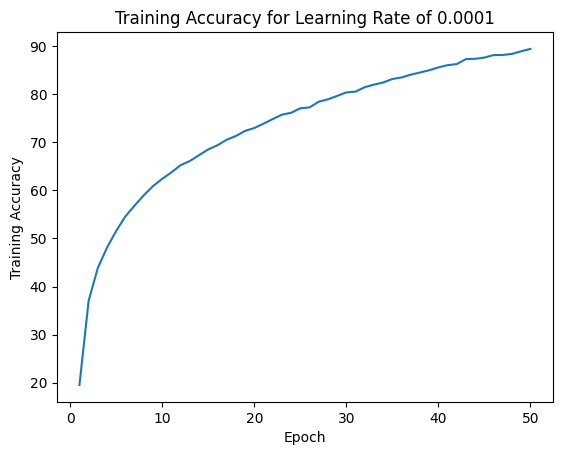

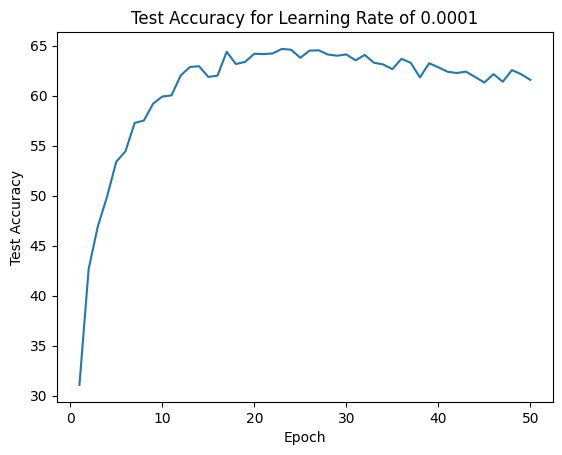

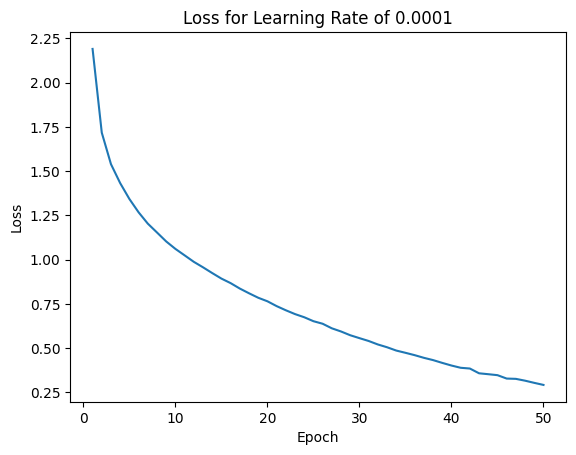

<Figure size 640x480 with 0 Axes>

In [ ]:
net = Net()
net.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9) ### THIS IS WHERE LEARNING RATE IS SET FOR EACH MODEL

num_epochs = 50
epoch_itr = np.arange(1,num_epochs+1)
loss_epoch = np.zeros(num_epochs)
train_acc = np.zeros(num_epochs)
test_acc = np.zeros(num_epochs)
print("Completed Epochs:")
for epoch in range(num_epochs):  # loop over the dataset multiple times

    running_loss = 0.0
    correct_train = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item() * inputs.size(0)
        correct_train += (outputs.argmax(axis=1) == labels).float().sum()

    loss_epoch[epoch] = running_loss / len(trainset)
    train_acc[epoch] = 100 * correct_train / len(trainset)
    # calculate testing accuracy and add to storage array
    correct = 0
    total = 0
    with torch.no_grad():
      for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    test_acc[epoch] = 100 * correct / total
    print(epoch+1,',',end='',sep='')

# Print graphs
for i,names in enumerate((('Training Accuracy',train_acc),("Test Accuracy",test_acc),("Loss",loss_epoch))):
    title, var_name = names
    plt.title(str(title) + " for Learning Rate of 0.0001")
    plt.xlabel("Epoch")
    plt.ylabel(str(title))
    plt.plot(epoch_itr,var_name)
    plt.figure()
plt.show()

## Question 7
Please add some data augmentation to avoid overfitting. Note that you need to do this only for the training and not the testing. ”RandomResizedCrop” samples a random patch from the image to train the model on. ”RandomHorizontalFlip” flips randomly chosen images horizontally.

With the random data augmentation, the training and testing accuracy don't follow the same trend as the other models. The training accuracy is consistently _below_ the testing accuracy, suggesting that the model is properly fitting and will become a base prediction model with enough training.

Files already downloaded and verified
Files already downloaded and verified
Completed Epochs:
1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,

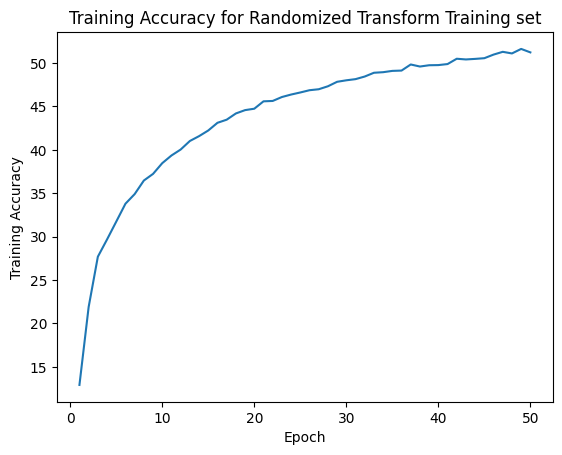

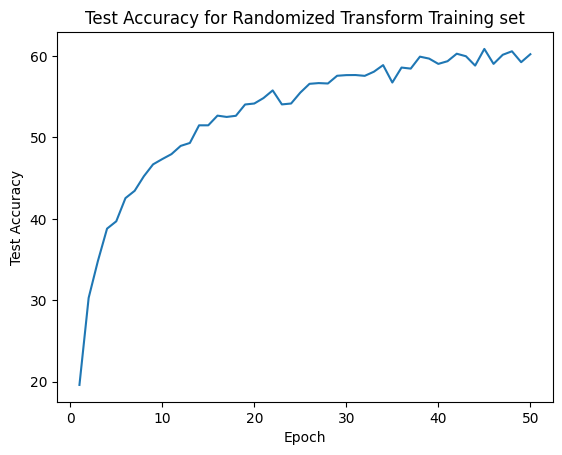

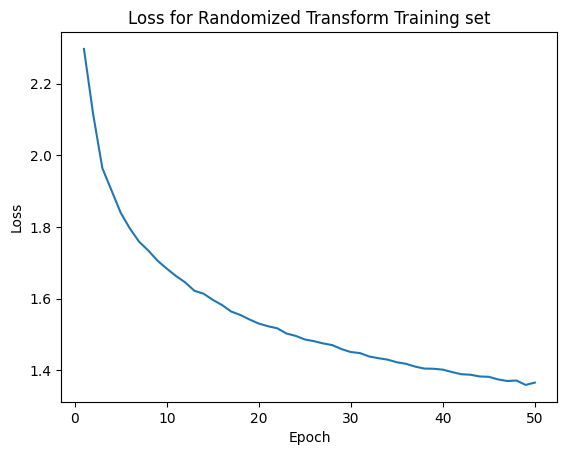

<Figure size 640x480 with 0 Axes>

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
import torch.optim as optim
import matplotlib.gridspec as gridspec
%matplotlib inline

# Define test set and data loader
transform_test = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
# Add transformations to training set
transform_train = transforms.Compose(
    [transforms.ToTensor(),
     transforms.RandomResizedCrop(32,antialias=None),
     transforms.RandomHorizontalFlip(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform_test)
testloader = torch.utils.data.DataLoader(testset, batch_size=200,
                                         shuffle=False, num_workers=2)

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform_train)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

net = Net()
net.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.0001, momentum=0.9)

num_epochs = 50
epoch_itr = np.arange(1,num_epochs+1)
loss_epoch = np.zeros(num_epochs)
train_acc = np.zeros(num_epochs)
test_acc = np.zeros(num_epochs)
print("Completed Epochs:")
for epoch in range(num_epochs):  # loop over the dataset multiple times

    running_loss = 0.0
    correct_train = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item() * inputs.size(0)
        correct_train += (outputs.argmax(axis=1) == labels).float().sum()

    loss_epoch[epoch] = running_loss / len(trainset)
    train_acc[epoch] = 100 * correct_train / len(trainset)
    # calculate testing accuracy and add to storage array
    correct = 0
    total = 0
    with torch.no_grad():
      for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    test_acc[epoch] = 100 * correct / total
    print(epoch+1,',',end='',sep='')

# Print graphs
for i,names in enumerate((('Training Accuracy',train_acc),("Test Accuracy",test_acc),("Loss",loss_epoch))):
    title, var_name = names
    plt.title(str(title) + " for Randomized Transform Training set")
    plt.xlabel("Epoch")
    plt.ylabel(str(title))
    plt.plot(epoch_itr,var_name)
    plt.figure()
plt.show()

### Question 8
Try multiple augmentations (maybe 10 times) at the test time and average
the final probability distributions (10 numbers) before evaluation. You may also do Dropout multiple times at the test time and average the results before evaluation.


In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
import torch.optim as optim
import matplotlib.gridspec as gridspec
%matplotlib inline

# Define test set and data loader
transform_train = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
# Add transformations to training set
transform_test = transforms.Compose(
    [transforms.ToTensor(),
     transforms.RandomResizedCrop(32,antialias=None),
     transforms.RandomHorizontalFlip(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform_test)
testloader = torch.utils.data.DataLoader(testset, batch_size=200,
                                         shuffle=False, num_workers=2)

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform_train)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

net = Net()
net.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.0001, momentum=0.9)

num_epochs = 25
epoch_itr = np.arange(1,num_epochs+1)
loss_epoch = np.zeros(num_epochs)
train_acc = np.zeros(num_epochs)
test_acc = np.zeros(num_epochs)
print("Completed Epochs:")
for epoch in range(num_epochs):  # loop over the dataset multiple times

    running_loss = 0.0
    correct_train = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item() * inputs.size(0)
        correct_train += (outputs.argmax(axis=1) == labels).float().sum()

    loss_epoch[epoch] = running_loss / len(trainset)
    train_acc[epoch] = 100 * correct_train / len(trainset)
    # calculate testing accuracy and add to storage array
    correct = 0
    total = 0
    with torch.no_grad():
      for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = 0
        for _ in range(10):
          aug_images = test_transform(images)
          output = net(aug_images)
          prob =
          outputs += prob
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    test_acc[epoch] = 100 * correct / total
    print(epoch+1,',',end='',sep='')

# Print graphs
for i,names in enumerate((('Training Accuracy',train_acc),("Test Accuracy",test_acc),("Loss",loss_epoch))):
    title, var_name = names
    plt.title(str(title) + " for Randomized Transform Testing set")
    plt.xlabel("Epoch")
    plt.ylabel(str(title))
    plt.plot(epoch_itr,var_name)
    plt.figure()
plt.show()